# Notes and scratch code for midterm 2
J. Cristiano

In [1]:
#Take a peak at the data

import numpy as np
training_data = np.load('./midterm2_training_data.npy')
training_labels = np.load('./midterm2_training_labels.npy')
predicted_labels = np.load('./cristiano_702431824.npy')

correct_predictions = np.sum(training_labels == predicted_labels)
print(f'Number of correct predictions: {correct_predictions}')
print(f'data: {training_data.shape} labels: {training_labels.shape}')
print(f'data type: {training_data.dtype} labels type: {training_labels.dtype}')

Number of correct predictions: 49712
data: (50000, 300) labels: (50000,)
data type: float64 labels type: uint8


In [2]:
print(f'training data: {training_data[0]} labels: {training_labels[0]}')

training data: [-9.74252683e-01 -1.80990285e+00  1.52850438e+00  5.24357702e-01
  1.81118576e+00 -2.87250484e+00  4.76424409e-01  1.39349414e+00
  1.71206883e+00  1.03710195e+00  4.84331507e-01  1.00171077e+00
  4.09124392e-01  4.16235592e-01  1.57464576e+00  3.48824604e-01
  1.81042205e+00 -3.35860496e-01  6.06989358e-01  3.21004229e-02
  8.13890571e-02  1.82834264e-01 -4.37875922e-01 -4.25384013e-01
  3.76413365e-01  1.11223462e-01  5.83066177e-01 -3.23374796e-02
  9.68774874e-01  1.08183095e+00  5.21809792e-01 -4.76276697e-01
  3.50855831e-01  5.03171899e-01 -5.24402044e-01 -7.18521809e-01
  1.35311692e-02 -2.65223276e-01 -4.05434163e-01 -5.22130228e-01
 -2.87794696e-01 -9.35783365e-01 -2.07833190e-01 -1.33523865e-01
  3.85584315e-01 -4.04030065e-01 -3.24807129e-01  5.46231311e-01
  1.46899513e-01 -2.20359769e-01 -1.95782646e-01 -4.57705729e-01
 -3.37845833e-01  5.98692475e-02  2.16760747e-01 -1.32838348e-02
 -2.28737747e-01  9.13408510e-02 -3.28914642e-01 -4.01929690e-01
  1.752156

In [3]:
import torch
from torch.utils.data import TensorDataset, random_split

# Convert numpy arrays to torch tensors
data_tensor = torch.tensor(training_data, dtype=torch.float64)
labels_tensor = torch.tensor(training_labels, dtype=torch.uint8)

# Create a TensorDataset
dataset = TensorDataset(data_tensor, labels_tensor)

# Calculate split lengths
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f'Training dataset size: {len(train_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Training dataset size: 40000
Test dataset size: 10000


In [4]:
from torch.utils.data import DataLoader

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print the number of batches
print(f'Number of training batches: {len(train_loader)}')
print(f'Number of testing batches: {len(test_loader)}')

Number of training batches: 625
Number of testing batches: 157


In [5]:
import torch
import torch.optim as optim
from torch import nn 
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

class BiggerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BiggerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.dropout1 = nn.Dropout(p=0.2)  # Add dropout layer after first fully connected layer
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

input_size = 300  
hidden_size = 500  # Number of neurons in the hidden layer
output_size = 10 
# Instantiate the model, define the loss function and the optimizer
# model = SimpleNN(input_size, hidden_size, output_size)
model = BiggerNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0002, momentum=0.95)
#design a sweep from lr = 0.0002 to 0.0003


In [6]:
best_loss_per_lr = []
train_losses_per_lr = []
test_losses_per_lr = []
for lr in [0.0002, 0.00022, 0.00024, 0.00026, 0.00028, 0.0003]:
    model = BiggerNN(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.95)
    print(f'Learning rate: {lr}')
    # Training loop
    num_epochs = 200
    train_losses = []
    test_losses = []
    convergence_epoch = 0
    best_test_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for points, labels in train_loader:
            points = points.float()
            labels = labels.long()
            # Forward pass
            outputs = model(points)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for points, labels in test_loader:
                points = points.float()
                labels = labels.long()
                outputs = model(points)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        
        # Save the model if test loss improves
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            np.save('best_model.npy', model.state_dict())
            # torch.save(model.state_dict(), 'best_model.pth')
        if epoch > 50:
            if convergence_epoch == 0 and best_test_loss < min(test_losses[-10:]):
                print(f'early stop at epoch {epoch+1}')
                convergence_epoch = epoch+1
                break
                
        if(epoch % 25 == 0 or epoch == num_epochs-1):
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
            if(epoch == num_epochs-1):
                print(f'Best Test Loss: {best_test_loss:.4f}')
                print(f'Convergence at epoch {convergence_epoch}')
    del model, optimizer, criterion
    best_loss_per_lr.append(best_test_loss)
    train_losses_per_lr.append(train_losses)
    test_losses_per_lr.append(test_losses)


Learning rate: 0.0002
Epoch [1/200], Train Loss: 2.2936, Test Loss: 2.2785
Epoch [26/200], Train Loss: 0.2013, Test Loss: 0.1780
Epoch [51/200], Train Loss: 0.1153, Test Loss: 0.1135
Epoch [76/200], Train Loss: 0.0786, Test Loss: 0.0919
Epoch [101/200], Train Loss: 0.0575, Test Loss: 0.0820
Epoch [126/200], Train Loss: 0.0438, Test Loss: 0.0765
Epoch [151/200], Train Loss: 0.0339, Test Loss: 0.0746
Epoch [176/200], Train Loss: 0.0268, Test Loss: 0.0735
early stop at epoch 200
Learning rate: 0.00022
Epoch [1/200], Train Loss: 2.2906, Test Loss: 2.2752
Epoch [26/200], Train Loss: 0.1902, Test Loss: 0.1659
Epoch [51/200], Train Loss: 0.1083, Test Loss: 0.1058
Epoch [76/200], Train Loss: 0.0705, Test Loss: 0.0867
Epoch [101/200], Train Loss: 0.0503, Test Loss: 0.0783
Epoch [126/200], Train Loss: 0.0376, Test Loss: 0.0742
Epoch [151/200], Train Loss: 0.0283, Test Loss: 0.0723
early stop at epoch 160
Learning rate: 0.00024
Epoch [1/200], Train Loss: 2.2884, Test Loss: 2.2688
Epoch [26/200], 

In [7]:
print(f'lrs : [0.0002, 0.00022, 0.00024, 0.00026, 0.00028, 0.0003]')
print(f'Best Losses: {best_loss_per_lr}')

lrs : [0.0002, 0.00022, 0.00024, 0.00026, 0.00028, 0.0003]
Best Losses: [0.0724026508355709, 0.07215847869279088, 0.07411077175256767, 0.0703364084103993, 0.07398178027853797, 0.07193776828927954]


ValueError: x and y must have same first dimension, but have shapes (200,) and (130,)

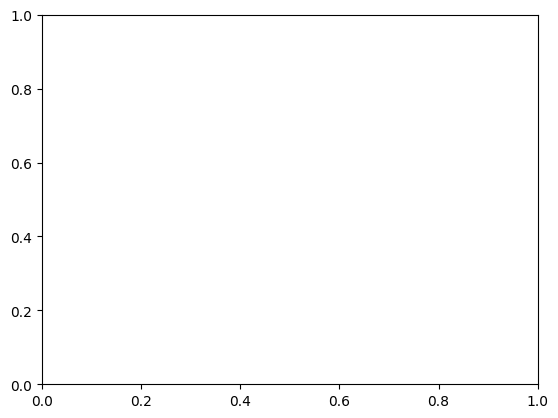

In [8]:
import matplotlib.pyplot as plt
# Plot the training and testing error over the epochs
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()